# CDC Covid-19 Vaccination Data Analysis/Forecasting

In [11]:
import warnings
import itertools
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt
# Below is imports for the Chorpleth Maps specificly
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

In [12]:
# Creating main dataframe
data_path = 'data/COVID-19_Vaccinations_in_the_United_States_County.csv'

df = pd.read_csv(data_path)

In [13]:
df.head(5)

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,...,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity
0,11/18/2021,05075,46,Lawrence County,AR,42.3,6938,6938.0,49.4,6534,...,C,11.0,11.0,12.0,12.0,Non-metro,7.0,7.0,8.0,8.0
1,11/18/2021,01053,46,Escambia County,AL,33.1,12112,12112.0,38.8,11677,...,D,14.0,14.0,15.0,15.0,Non-metro,6.0,6.0,7.0,7.0
2,11/18/2021,19171,46,Tama County,IA,58.0,9777,9777.0,68.8,9132,...,B,8.0,8.0,8.0,8.0,Non-metro,8.0,8.0,8.0,8.0
3,11/18/2021,06043,46,Mariposa County,CA,0.0,0,0.0,0.0,0,...,C,NaN,NaN,NaN,NaN,Non-metro,NaN,NaN,NaN,NaN
4,11/18/2021,19097,46,Jackson County,IA,49.2,9568,9568.0,57.4,9217,...,A,3.0,4.0,4.0,4.0,Non-metro,7.0,8.0,8.0,8.0


In [14]:
#columns = df.columns

#for col in columns:
    #print(f'{col}\n{df[col].describe()}\n')

In [15]:
# Changing Date column to datetime dtype
df['Date'] = pd.to_datetime(df['Date'])

## Line Plots

In [16]:
# Averaging values for each day 
averaged_df = df.groupby(df['Date']).mean()
averaged_df.reset_index(inplace = True)
averaged_df.head(5)

,Date,MMWR_week,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,...,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity
0,2020-12-13,51.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-12-14,51.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-12-15,51.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.005252,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-12-16,51.0,0.0,0.000918,0.000931,0.0,0.000918,0.0,0.000000,0.0,...,0.098837,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-12-17,51.0,0.0,0.013130,0.013003,0.0,0.012824,0.0,0.003359,0.0,...,0.791450,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


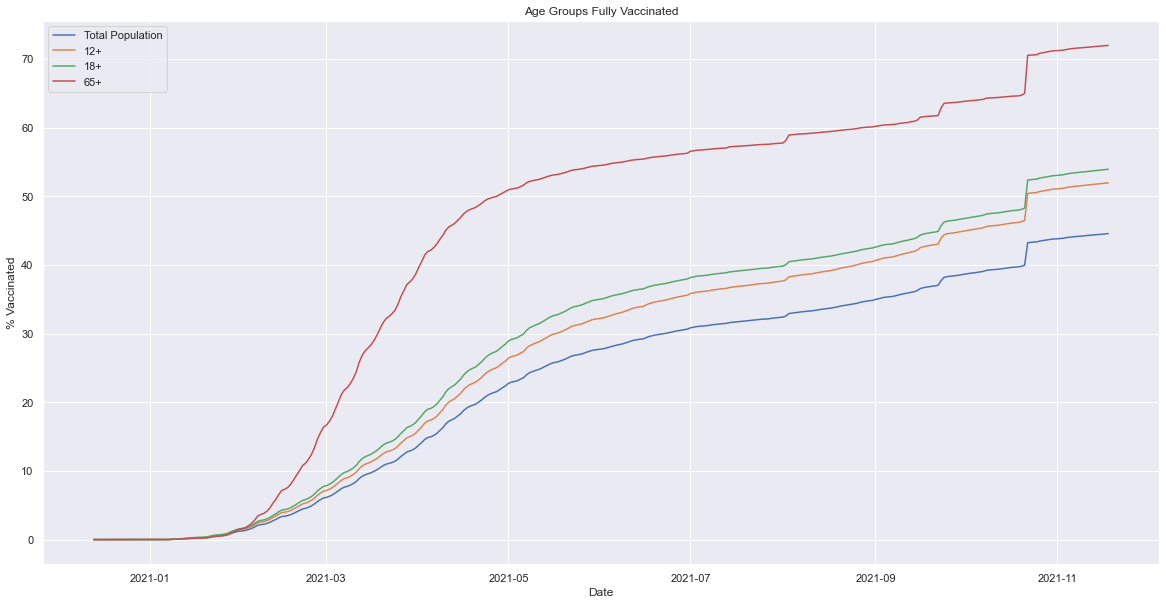

In [17]:
# Time series plot of total population and different age groups given within the data for being fully vaccinated
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(20,10)})
fig, ax = plt.subplots()
ax = sns.lineplot(x='Date', y='Series_Complete_Pop_Pct', data=averaged_df)
ax1 = sns.lineplot(x='Date', y='Series_Complete_12PlusPop_Pct', data=averaged_df)
ax2 = sns.lineplot(x='Date', y='Series_Complete_18PlusPop_Pct', data=averaged_df)
ax3 = sns.lineplot(x='Date', y= 'Series_Complete_65PlusPop_Pct', data = averaged_df)

ax.set_xlabel('Date')
ax.set_ylabel('% Vaccinated')
plt.title("Age Groups Fully Vaccinated")
plt.legend(labels=["Total Population","12+", "18+", "65+"])

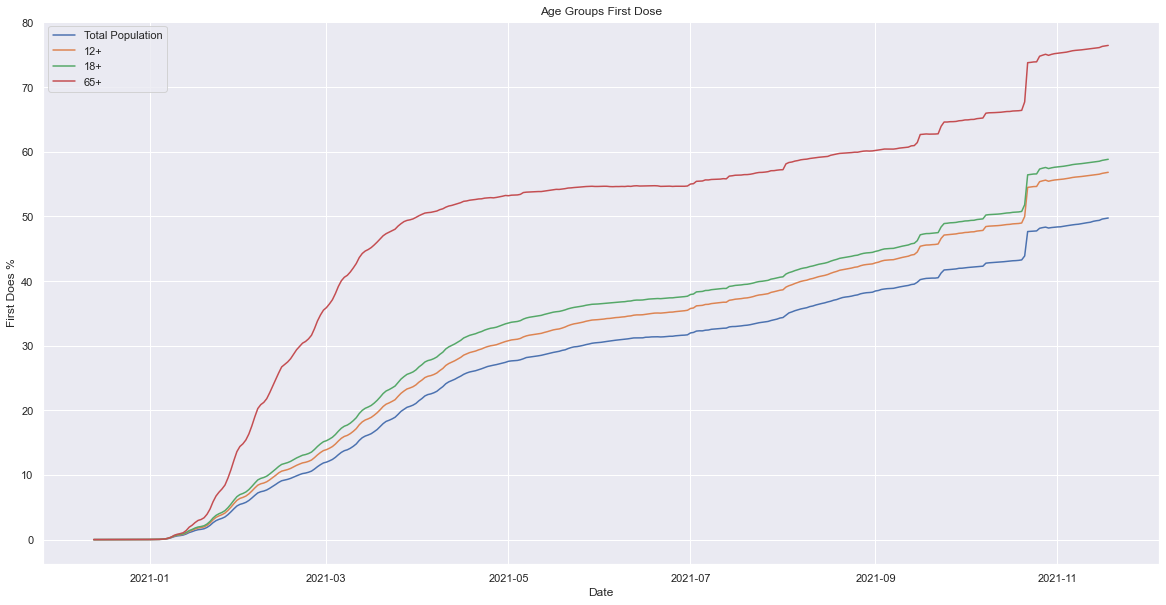

In [18]:
# Time series plot of total population and different age groups given within the data for being given a first dose
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(20,10)})
fig, ax = plt.subplots()
ax = sns.lineplot(x='Date', y='Administered_Dose1_Pop_Pct', data=averaged_df)
ax1 = sns.lineplot(x='Date', y='Administered_Dose1_Recip_12PlusPop_Pct', data=averaged_df)
ax2 = sns.lineplot(x='Date', y='Administered_Dose1_Recip_18PlusPop_Pct', data=averaged_df)
ax3 = sns.lineplot(x='Date', y= 'Administered_Dose1_Recip_65PlusPop_Pct', data = averaged_df)

ax.set_xlabel('Date')
ax.set_ylabel('First Does %')
plt.title("Age Groups First Dose")
plt.legend(labels=["Total Population","12+", "18+", "65+"])

NOTE: The two time series plots above seem to show people who are fully vaccinated double counted with those who have recieved a first dose. 

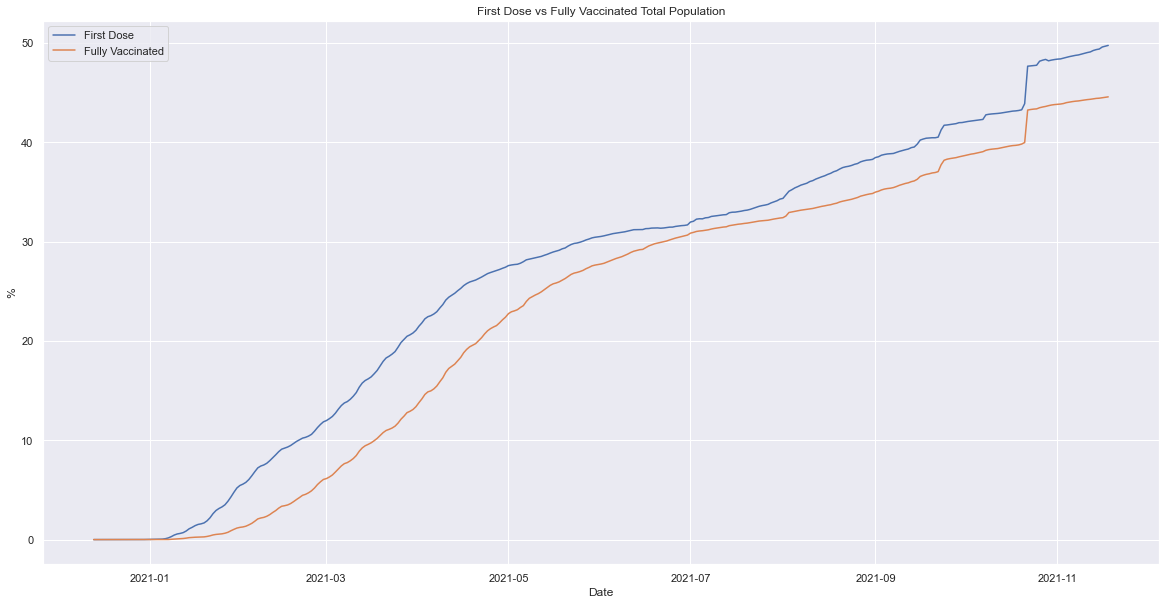

In [19]:
# Time series plot of the total population who have recieved a first dose vs who are fully vaccinated
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(20,10)})
fig, ax = plt.subplots()
ax = sns.lineplot(x='Date', y='Administered_Dose1_Pop_Pct', data=averaged_df)
ax1 = sns.lineplot(x='Date', y='Series_Complete_Pop_Pct', data=averaged_df)


ax.set_xlabel('Date')
ax.set_ylabel('%')
plt.title("First Dose vs Fully Vaccinated Total Population")
plt.legend(labels=["First Dose","Fully Vaccinated"])

## Bar Plots

In [20]:
# Using the most recent date 
first_row = df.head(1)

current_date = first_row['Date']

# Create dataframe with only the most recent date
current_df = df.copy()
current_df.index = current_df['Date']
current_df = current_df.loc[current_date]
current_df.drop('Date', axis = 1, inplace = True)
current_df.reset_index(inplace = True)

current_df

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,...,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity
0,2021-11-18,05075,46,Lawrence County,AR,42.3,6938,6938.0,49.4,6534,...,C,11.0,11.0,12.0,12.0,Non-metro,7.0,7.0,8.0,8.0
1,2021-11-18,01053,46,Escambia County,AL,33.1,12112,12112.0,38.8,11677,...,D,14.0,14.0,15.0,15.0,Non-metro,6.0,6.0,7.0,7.0
2,2021-11-18,19171,46,Tama County,IA,58.0,9777,9777.0,68.8,9132,...,B,8.0,8.0,8.0,8.0,Non-metro,8.0,8.0,8.0,8.0
3,2021-11-18,06043,46,Mariposa County,CA,0.0,0,0.0,0.0,0,...,C,NaN,NaN,NaN,NaN,Non-metro,NaN,NaN,NaN,NaN
4,2021-11-18,19097,46,Jackson County,IA,49.2,9568,9568.0,57.4,9217,...,A,3.0,4.0,4.0,4.0,Non-metro,7.0,8.0,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3278,2021-11-18,27083,46,Lyon County,MN,51.9,13229,13213.0,63.0,12383,...,B,8.0,8.0,8.0,8.0,Non-metro,8.0,8.0,8.0,8.0
3279,2021-11-18,30015,46,Chouteau County,MT,29.0,1635,1635.0,33.3,1538,...,B,5.0,6.0,6.0,7.0,Non-metro,5.0,6.0,6.0,7.0
3280,2021-11-18,45003,46,Aiken County,SC,42.8,73134,73074.0,49.6,69429,...,C,11.0,11.0,12.0,12.0,Metro,3.0,3.0,4.0,4.0
3281,2021-11-18,55087,46,Outagamie County,WI,58.2,109273,109269.0,68.6,101618,...,A,4.0,4.0,4.0,4.0,Metro,4.0,4.0,4.0,4.0


In [21]:
# Group by State
current_df_by_state = current_df.groupby(current_df['Recip_State']).mean()
current_df_by_state.reset_index(inplace = True)

# Showing the first 5 states
current_df_by_state.head(5)

,Recip_State,MMWR_week,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,...,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity
44,PR,46.0,69.158228,30042.177215,30036.772152,77.322785,27712.265823,77.225316,7292.772152,77.712658,...,8238.974684,85.974684,9.987179,10.000000,10.000000,9.730769,4.448718,4.461538,4.461538,4.192308
24,ME,46.0,62.523529,56706.411765,56703.823529,70.752941,53444.000000,72.282353,16135.411765,86.200000,...,18067.411765,91.800000,7.000000,7.000000,7.000000,7.000000,6.750000,6.750000,6.750000,6.750000
7,CT,46.0,61.277778,283340.000000,283275.333333,69.711111,262678.111111,70.744444,65745.777778,82.822222,...,76180.222222,88.677778,7.500000,7.500000,7.500000,7.500000,4.500000,4.500000,4.500000,4.500000
39,NY,46.0,59.060317,209498.825397,209482.269841,67.796825,196014.841270,69.209524,45204.634921,83.026984,...,50943.650794,90.100000,9.306452,9.403226,9.403226,9.403226,5.435484,5.532258,5.532258,5.532258
36,NJ,46.0,58.636364,271689.090909,271676.954545,67.963636,252378.318182,69.731818,59463.136364,77.572727,...,68014.238095,91.754545,8.619048,8.761905,8.761905,8.714286,3.857143,4.000000,4.000000,3.952381


Text(0.5, 1.0, 'Total Vaccination % by State')

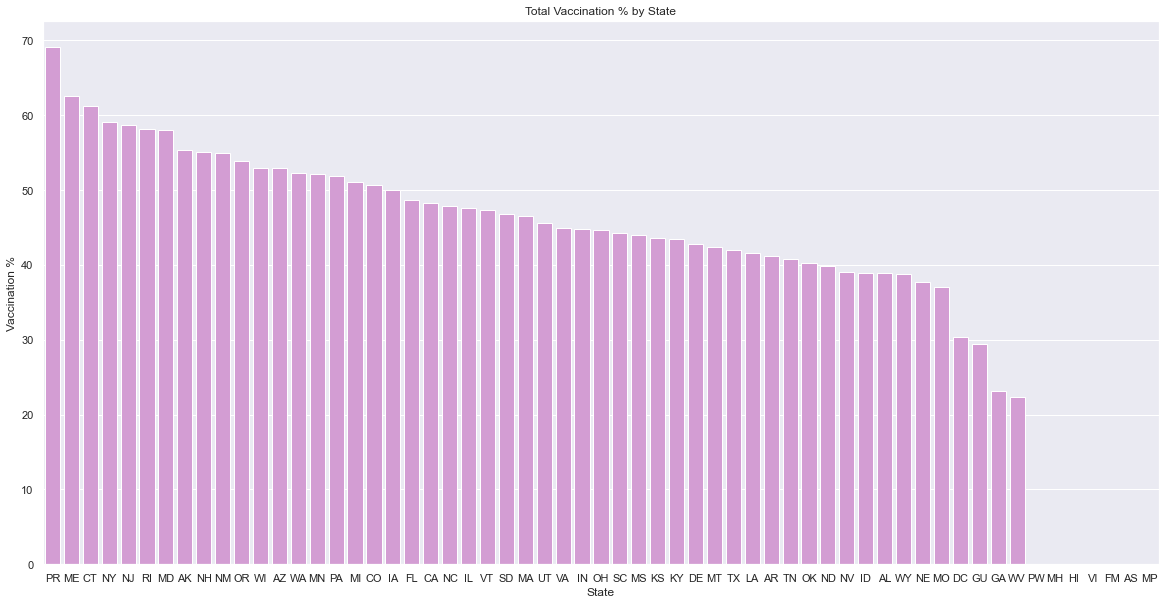

In [25]:
# Bar plot plotting total vaccination percentage by state  
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(20,10)})
ax = sns.barplot(x="Recip_State", y="Series_Complete_Pop_Pct",  color="violet", saturation=.5, data=current_df_by_state.sort_values('Series_Complete_Pop_Pct', ascending = False))
ax.set(xlabel='State', ylabel='Vaccination %')
plt.title("Total Vaccination % by State")

Text(0.5, 1.0, 'First Dose % by State')

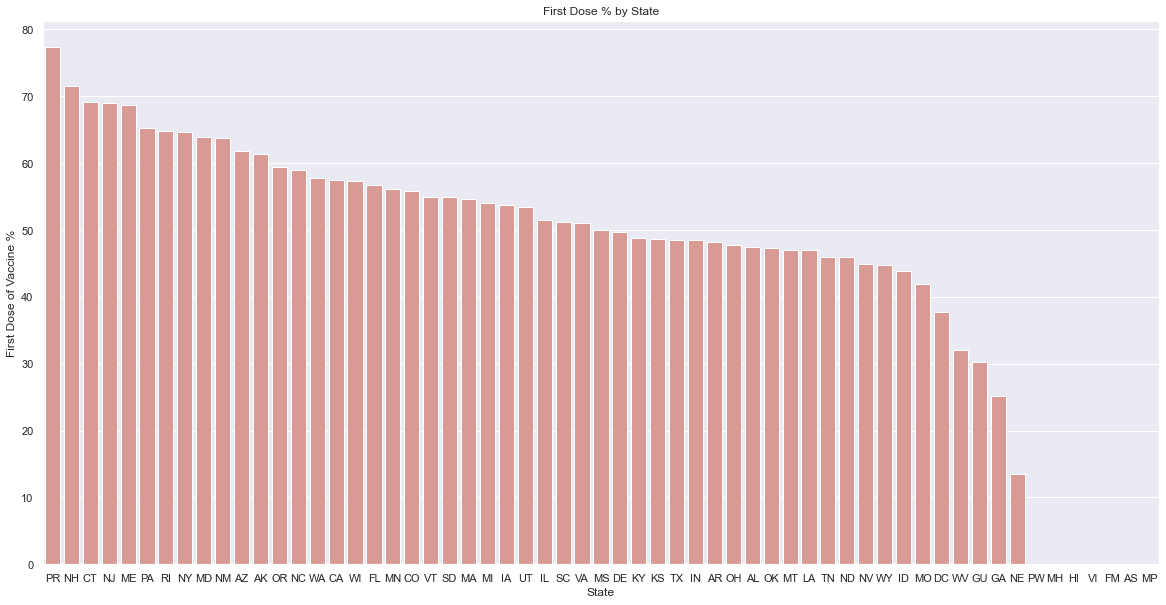

In [24]:
# Bar plot plotting first dose percentage by state 
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(20,10)})
ax = sns.barplot(x="Recip_State", y="Administered_Dose1_Pop_Pct",  color="salmon", saturation=.5, data=current_df_by_state.sort_values('Administered_Dose1_Pop_Pct', ascending = False))
ax.set(xlabel='State', ylabel='First Dose of Vaccine %')
plt.title("First Dose % by State")

## Choropleth Maps

In [26]:
# To big for github

# Create dataframe with date column only containing year and month
# and reverse the dataframe so that the first row is the oldest date

county = df.copy()
county['Date'] = county['Date'].dt.strftime('%Y-%m')
county = county.iloc[::-1]
county.head(5)


,Date,FIPS,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,...,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity
1122476,2020-12,21017,51,Bourbon County,KY,0.0,0,0.0,0.0,0,...,C,NaN,NaN,NaN,NaN,Metro,NaN,NaN,NaN,NaN
1122475,2020-12,36053,51,Madison County,NY,0.0,0,0.0,0.0,0,...,A,NaN,NaN,NaN,NaN,Metro,NaN,NaN,NaN,NaN
1122474,2020-12,29189,51,St. Louis County,MO,0.0,0,0.0,0.0,0,...,B,NaN,NaN,NaN,NaN,Metro,NaN,NaN,NaN,NaN
1122473,2020-12,17117,51,Macoupin County,IL,0.0,0,0.0,0.0,0,...,A,NaN,NaN,NaN,NaN,Metro,NaN,NaN,NaN,NaN
1122472,2020-12,42109,51,Snyder County,PA,0.0,0,0.0,0.0,0,...,A,NaN,NaN,NaN,NaN,Non-metro,NaN,NaN,NaN,NaN


In [15]:
# Choropleth map showing the total population that is fully vaccinated, down to the county level using FIPS
# fig = px.choropleth(county, geojson=counties, locations='FIPS', color='Series_Complete_Pop_Pct',
#                            color_continuous_scale="Viridis", animation_frame="Date",
#                            range_color=(0, 100),
#                            scope="usa",
#                            labels={'Series_Complete_Pop_Pct':'Percent fully vaccinated'}
#                           )
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()

In [16]:
# Choropleth map showing the 12+ population that is fully vaccinated, down to the county level using FIPS
# fig = px.choropleth(county, geojson=counties, locations='FIPS', color='Series_Complete_12PlusPop_Pct',
#                            color_continuous_scale="Viridis", animation_frame="Date",
#                            range_color=(0, 100),
#                            scope="usa",
#                            labels={'Series_Complete_12PlusPop_Pct':'Percent fully vaccinated 12+'}
#                           )
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()

In [17]:
# Choropleth map showing the 18+ population that is fully vaccinated, down to the county level using FIPS
# fig = px.choropleth(county, geojson=counties, locations='FIPS', color='Series_Complete_18PlusPop_Pct',
#                            color_continuous_scale="Viridis", animation_frame="Date",
#                            range_color=(0, 100),
#                            scope="usa",
#                            labels={'Series_Complete_18PlusPop_Pct':'Percent fully vaccinated 18+'}
#                           )
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()

In [18]:
# Choropleth map showing the 65+ population that is fully vaccinated, down to the county level using FIPS
# fig = px.choropleth(county, geojson=counties, locations='FIPS', color='Series_Complete_65PlusPop_Pct',
#                            color_continuous_scale="Viridis", animation_frame="Date",
#                            range_color=(0, 100),
#                            scope="usa",
#                            labels={'Series_Complete_65PlusPop_Pct':'Percent fully vaccinated 65+'}
#                           )
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()

## Forecasting with SARIMAX

Taken/Modifed from this tutorial: https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3

### Forecasting Total Population Vaccination Percentage

In [27]:
# Creating series with only total pop percentage
total_df = df.groupby([df['Date']]).mean()
total_series = total_df['Series_Complete_Pop_Pct']

#### Gridsearch

In [28]:
# Define the p, d and q parameters to take any value between 0 and 3
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [29]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

# dictionary with keys as params and values as AIC
params_aic = {}

for param in pdq:
    for param_seasonal in seasonal_pdq:
            model = sm.tsa.statespace.SARIMAX(total_series,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = model.fit()
            # combine p, d, q with seasonal p, d, q
            comb_params = param + param_seasonal
            # storing the combined params and resulting aic's in the dictionary
            params_aic[comb_params] = results.aic
            #print(f'ARIMA{param}x{param_seasonal} - AIC:{results.aic}')

# taking the params of the lowest aic          
min_aic = min(params_aic, key = params_aic.get)
print(f'Lowest AIC:{params_aic[min_aic]}')
print(f'Best Params:{min_aic}')

Lowest AIC:-145.37518704472296
Best Params:(0, 2, 1, 0, 0, 0, 12)


In [30]:
# Splitting the params tuple into the p, d, q and seasonal p, d, q
best_params = min_aic[:3] # p, d, q
best_params_seasonal = min_aic[3:] #seasonal p, d, q

In [31]:
# creating the model with the best parameters 
mod = sm.tsa.statespace.SARIMAX(total_series,
                                order = best_params,
                                seasonal_order = best_params_seasonal,
                                enforce_stationarity = False,
                                enforce_invertibility = False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0814      0.032    -34.281      0.000      -1.143      -1.020
sigma2         0.0320      0.002     18.003      0.000       0.029       0.036


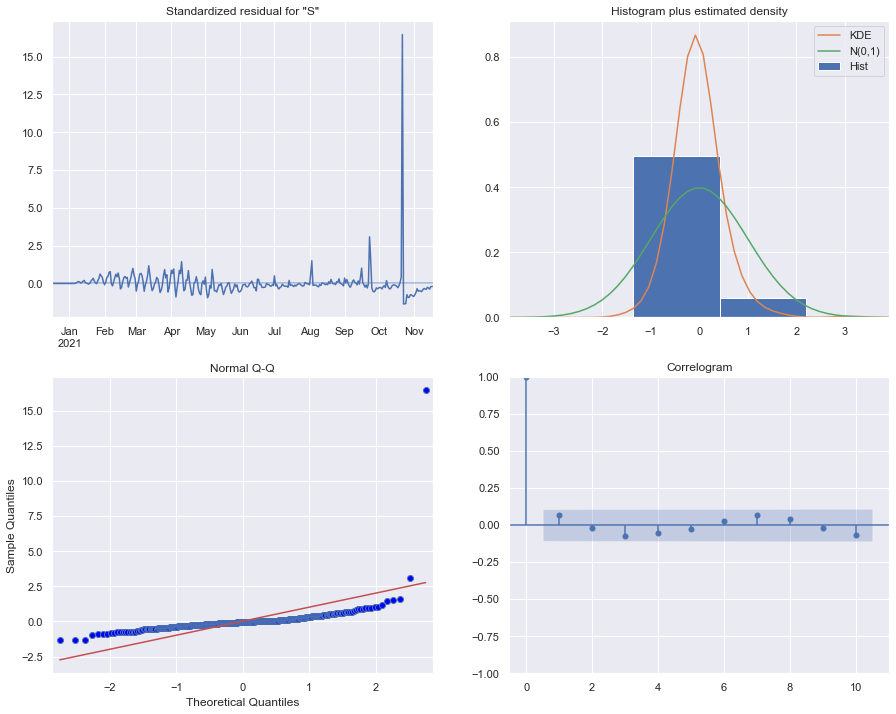

In [32]:
# Model Diagnostics, focusing on the upper right and lower left
# With the upper right chart we want the KDE line to follow closely to the N(0,1) line (a normal distribution)
# Here it doesn't but could be improved by a wider grid search
# The bottom left shows the residuals in a ordered distribution, plotted with a normal distribution
# If the blue dots are roughly strait, this signifies that the residuals are normally distributed
# Which is somewhat the case here (again a wider gridsearch may improves these diagnostics)
# To help understand the normal Q-Q plot https://data.library.virginia.edu/understanding-q-q-plots/
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [33]:
# Dynamic Forecast (Using data up to a certain point, then using previous forcasted points)
pred_dynamic = results.get_prediction(start=pd.to_datetime('2021-08-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()


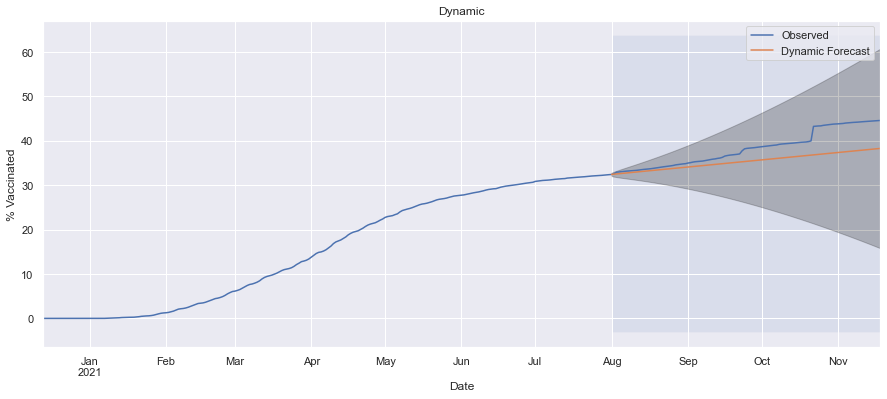

In [34]:
ax = total_series.plot(label='Observed',figsize=(15, 6))

pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2021-08-01'),total_series.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('% Vaccinated')
plt.title("Dynamic")

plt.legend()
plt.show()

In [35]:
# Extract the predicted and true values of our time series
dynamic_y_forecasted = pred_dynamic.predicted_mean
dynamic_y_truth = total_series['2021-08-01':]

# Compute the mean square error
mse_dynamic = ((dynamic_y_forecasted - dynamic_y_truth) ** 2).mean()

In [36]:
# One-step ahead Forecast (using full history of the data)
pred = results.get_prediction(start=pd.to_datetime('2021-08-01'), dynamic=False)
pred_ci = pred.conf_int()

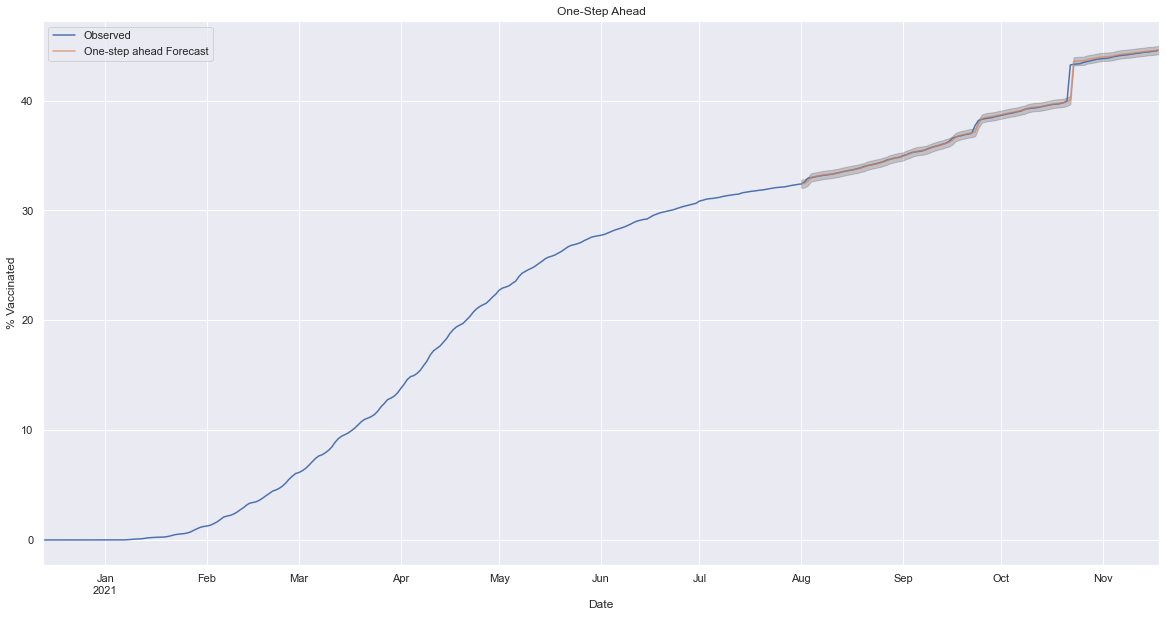

In [37]:
ax = total_series.plot(label='Observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('% Vaccinated')
plt.title("One-Step Ahead")
plt.legend()

plt.show()

In [38]:
osa_y_forecasted = pred.predicted_mean
osa_y_truth = total_series['2021-08-01':]

# Compute the mean square error
mse_osa = ((osa_y_forecasted - osa_y_truth) ** 2).mean()

In [39]:
# Compare the two MSEs
print(f"Dynamic MSE: {round(mse_dynamic, 2)}\nOne-Step Ahead MSE: {round(mse_osa, 2)}")

Dynamic MSE: 13.32
One-Step Ahead MSE: 0.1


- Between the One-Step Ahead and the Dymanic forcasts, the One-Step ahead produced a lower MSE, so we will be using that type of forecasting moving forward

In [40]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=200)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

In [44]:
# Get forecast until vaccination is 70%

for i in range(1000):
    pred_uc = results.get_forecast(steps= 1 + i)
    if pred_uc.predicted_mean.values[-1] >= 70:
        break

print(pred_uc.predicted_mean.values[-1])
print(len(pred_uc.predicted_mean))
print("Predicted Date:",pred_uc.predicted_mean.index[-1])   


70.04151444174097
326
Predicted Date: 2022-10-10 00:00:00


In [42]:
# Get confidence intervals of forecast
pred_ci = pred_uc.conf_int()

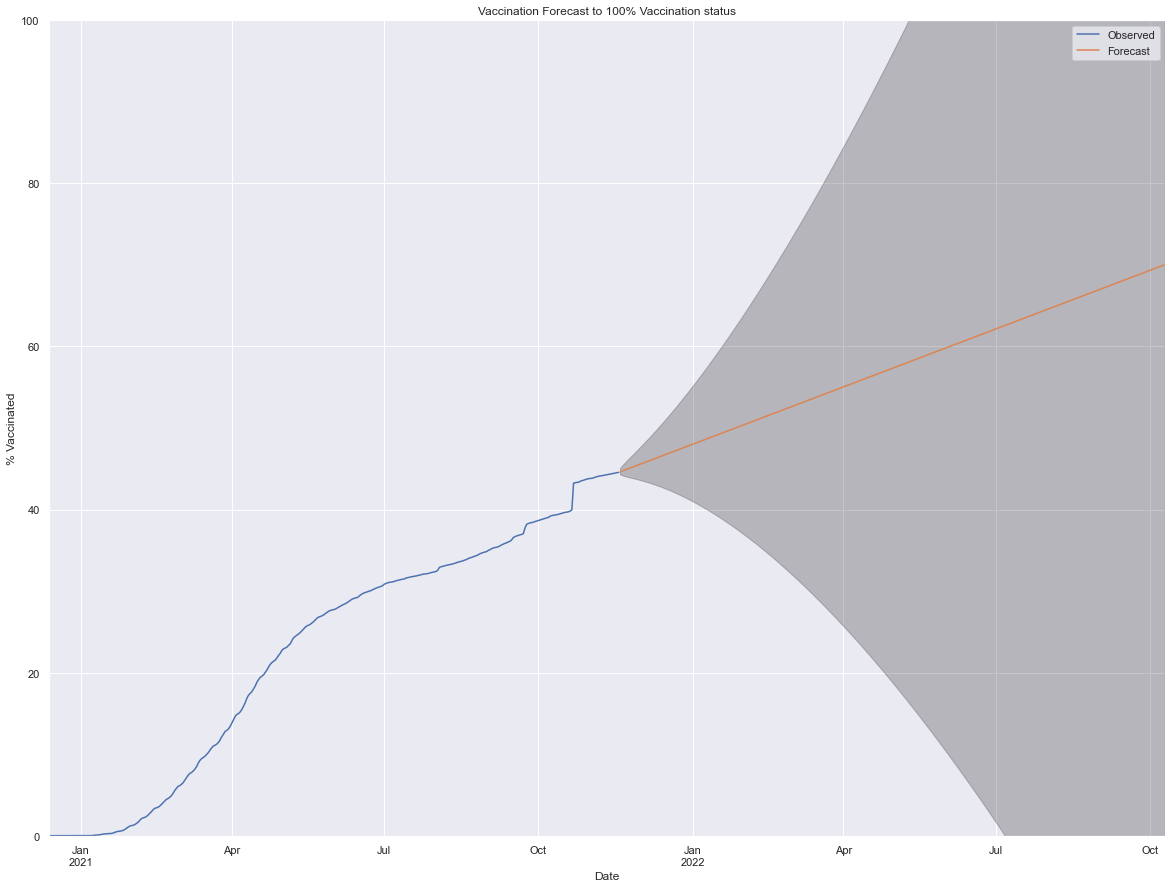

In [43]:
ax = total_series.plot(label='Observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)

ax.set_xlabel('Date')
ax.set_ylabel('% Vaccinated')
ax.set_ylim([0, 100])
plt.title("Vaccination Forecast to 100% Vaccination status")

plt.legend()
plt.show()

### Forecasting Vaccination Percentage by State/Territory

In [45]:
# Removing the States/Territories with no vaccination % data
states = list(df['Recip_State'].unique())

for state in df['Recip_State'].unique():
    state_df = df.loc[df['Recip_State'] == state]
    if state_df['Series_Complete_Pop_Pct'].sum() <= 0:
        states.remove(state)
        print(f'State/Territory Removed:{state}')

State/Territory Removed:VI
State/Territory Removed:AS
State/Territory Removed:FM
State/Territory Removed:PW
State/Territory Removed:MH
State/Territory Removed:MP
State/Territory Removed:UNK


In [46]:
# creating vaccination % plot by state
def create_state_plot(df):
    state = str(input('Enter State Abv:'))
    state_df = create_state_df(state=state, df=df)
    ax = sns.lineplot(x="Date", y="Series_Complete_Pop_Pct",  color="violet", data=state_df)
    ax.set(xlabel='Date', ylabel='Vaccination %')
    plt.title(f"Vaccination % in {state}")

In [47]:
# creating df with only one particular state
def create_state_df(state, df):
    state_df = df.loc[df['Recip_State'] == state]
    state_df = state_df.groupby([state_df['Date'], state_df['Recip_State']]).mean()
    state_df.reset_index(inplace = True)
    state_df = state_df[['Date', "Series_Complete_Pop_Pct"]]
    state_df.set_index('Date', inplace = True)
    return state_df

Enter State Abv:ME


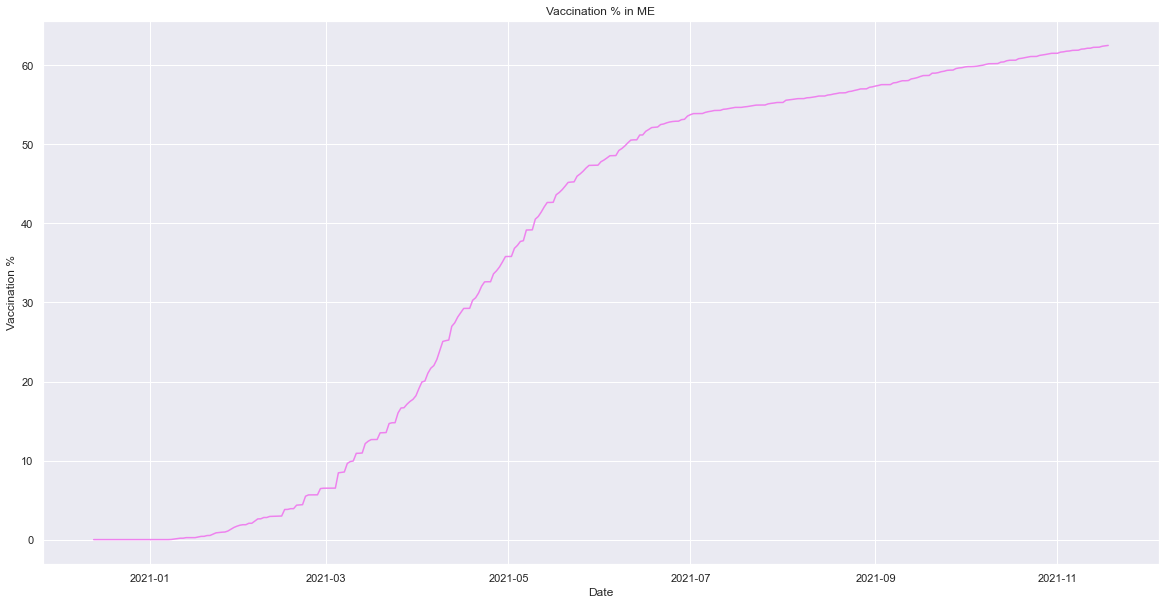

In [48]:
# To see state's current vaccination rate
create_state_plot(df)

### Gridsearch

In [49]:
# Define the p, d and q parameters to take any value between 0 and 2
# Due to hardware restraints, the parameter range can only be these values, as the computations would take to long
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]


In [50]:
warnings.filterwarnings("ignore") # specify to ignore warning messages


by_state_params = {}

for state in states:
    params_aic = {}
    #print(state)
    for param in pdq:
        for param_seasonal in seasonal_pdq:
        
                state_df = create_state_df(state, df)       
                model = sm.tsa.statespace.SARIMAX(state_df,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = model.fit()
                comb_params = param + param_seasonal
                params_aic[comb_params] = results.aic
                #print(f'ARIMA{param}x{param_seasonal} - AIC:{results.aic}')
      
    
    best_params = min(params_aic, key = params_aic.get)
    print(f'{state} Lowest AIC:{params_aic[best_params]}')
    print(f'{state} Best Params:{best_params}')
    by_state_params[state] = best_params

AR Lowest AIC:-349.8041279453174
AR Best Params:(1, 1, 1, 0, 0, 0, 12)
AL Lowest AIC:-293.0473691923177
AL Best Params:(1, 1, 1, 0, 0, 0, 12)
IA Lowest AIC:-359.9906564044582
IA Best Params:(1, 1, 0, 0, 0, 0, 12)
CA Lowest AIC:-558.7608762188502
CA Best Params:(1, 1, 1, 0, 0, 0, 12)
KY Lowest AIC:-240.6095762761123
KY Best Params:(1, 1, 1, 0, 0, 0, 12)
MN Lowest AIC:-33.7509487294237
MN Best Params:(1, 1, 1, 0, 0, 0, 12)
PR Lowest AIC:185.15359511096239
PR Best Params:(1, 1, 1, 0, 0, 0, 12)
NC Lowest AIC:-412.1858956268862
NC Best Params:(1, 1, 1, 0, 0, 0, 12)
AK Lowest AIC:-189.11078228570693
AK Best Params:(1, 1, 1, 0, 0, 0, 12)
MO Lowest AIC:-588.0404595419541
MO Best Params:(1, 1, 1, 0, 0, 0, 12)
TX Lowest AIC:1437.2074268684642
TX Best Params:(0, 1, 1, 0, 1, 1, 12)
MI Lowest AIC:-110.57464760252044
MI Best Params:(1, 1, 1, 0, 0, 0, 12)
MA Lowest AIC:-539.5234438810577
MA Best Params:(1, 1, 1, 0, 0, 0, 12)
MS Lowest AIC:-151.33829512634762
MS Best Params:(1, 1, 1, 0, 0, 0, 12)
GA L

In [54]:
### Uncomment to plot forecasting models against already observed data ###

# for state in states:
#     # Creating the model
#     parameters = by_state_params[state]
#     best_params = parameters[:3]
#     best_params_seasonal = parameters[3:]
#     state_df = create_state_df(state, df)
    
#     mod = sm.tsa.statespace.SARIMAX(state_df,
#                                     order = best_params,
#                                     seasonal_order = best_params_seasonal,
#                                     enforce_stationarity = False,
#                                     enforce_invertibility = False)

#     results = mod.fit()



#     # Getting the Prediction
#     pred = results.get_prediction(start=pd.to_datetime('2021-08-01'), dynamic=False)
#     pred_ci = pred.conf_int()


#     # Plotting the forecast against already observed data
#     ax = state_df.plot(label='Observed',figsize=(15, 6))

#     pred.predicted_mean.plot(label='One-Step Ahead Forecast', ax=ax)

#     ax.fill_between(pred_ci.index,
#                     pred_ci.iloc[:, 0],
#                     pred_ci.iloc[:, 1], color='k', alpha=.25)

#     ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2021-08-01'), state_df.index[-1],
#                      alpha=.1, zorder=-1)
    
    
#     ax.set_xlabel('Date')
#     ax.set_ylabel('% Vaccinated')
    
#     plt.title(f"{state}")
#     plt.legend(labels = ["Observed", "Forecast"])
#     plt.show()
# #print(results.summary().tables[1])

In [52]:
def forecasting_by_state(df):
    state = str(input("Enter State/Territory Abbreviation: "))
    #creating the model
    parameters = by_state_params[state]
    best_params = parameters[:3]
    best_params_seasonal = parameters[3:]
    
    state_df = create_state_df(state, df)

    mod = sm.tsa.statespace.SARIMAX(state_df,
                                    order = best_params,
                                    seasonal_order = best_params_seasonal,
                                    enforce_stationarity = False,
                                    enforce_invertibility = False)

    results = mod.fit()
    
    
    # Get forecast until vaccination is 100%

    for i in range(1000):
        pred_uc = results.get_forecast(steps= 1 + i)
        if pred_uc.predicted_mean.values[-1] >= 70:
            break


    # Get confidence intervals of forecasts
    pred_ci = pred_uc.conf_int()
    
    # Plotting the forecast
    ax = state_df.plot(label='Observed', figsize=(20, 15))
    pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.25)
    ax.set_xlabel('Date')
    ax.set_ylabel('% Vaccinated')
    
    ax.set_ylim([0, 100])
    
    plt.title(f"{state}")
    plt.legend(labels = ["Observed", "Forecast"])
    plt.show()
    print("Predicted Date:",pred_uc.predicted_mean.index[-1])

Enter State/Territory Abbreviation: ME


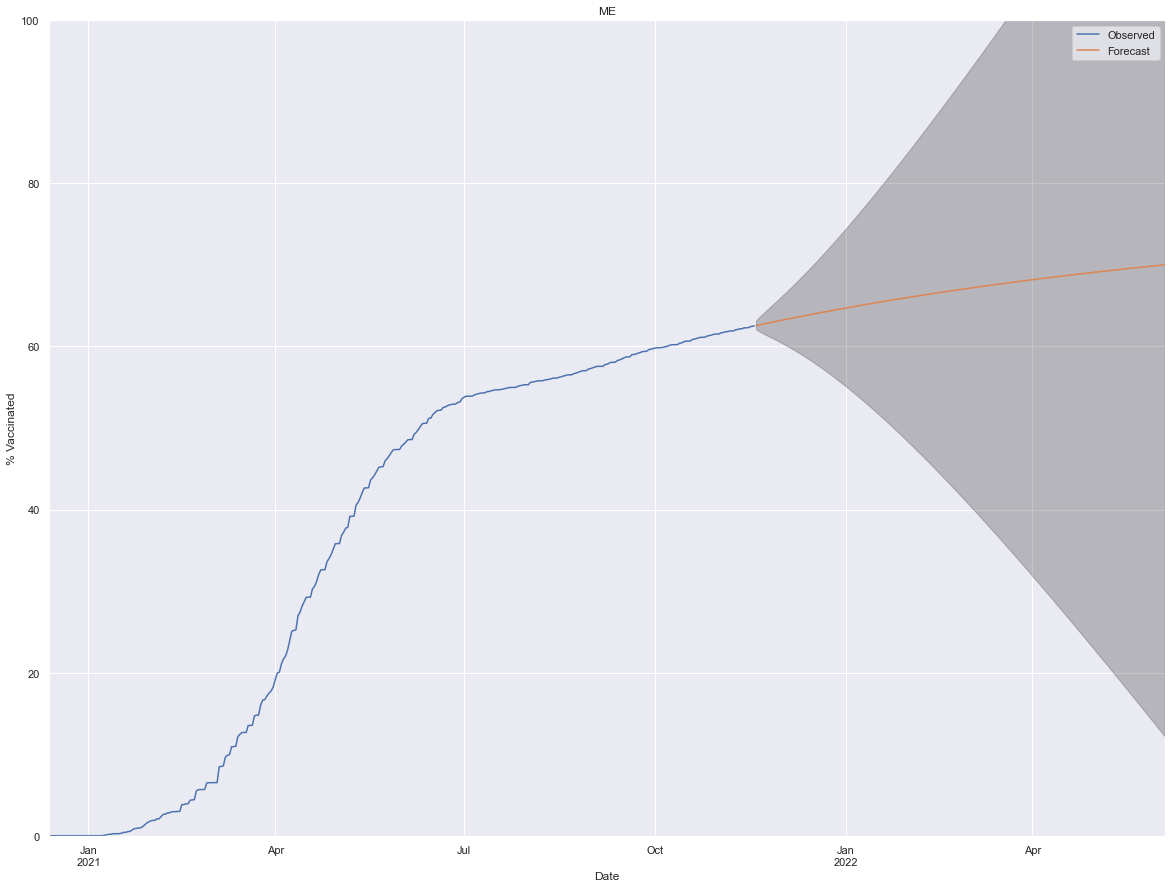

Predicted Date: 2022-06-04 00:00:00


In [53]:
forecasting_by_state(df)